In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [14]:
train_root = '_path_to_training_images'
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30, fill_mode='nearest')

img_width = 28
img_height = 28
batch_size = 32

train_generator = datagen.flow_from_directory(
    train_root,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb')


Found 3330 images belonging to 10 classes.


In [15]:
test_root = '_path_to_test_images'

test_generator = datagen.flow_from_directory(
    test_root,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb')


Found 1110 images belonging to 10 classes.


In [16]:
val_root = '_path_to_validation_images'

val_generator = datagen.flow_from_directory(
    val_root,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb') #grayscale


Found 1110 images belonging to 10 classes.


In [17]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [18]:
model = prepare_model()


In [19]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                86544     
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 87,610
Trainable params: 87,610
Non-trainable params: 0
__________________________________________________

In [20]:
history = model.fit_generator(train_generator,
                    validation_data = val_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = val_generator.n//val_generator.batch_size,
                    epochs=5)


Epoch 1/5


/tmp/ipykernel_33188/4215262457.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


104/104 [==============================] - 9s 80ms/step - loss: 0.3144 - accuracy: 0.3220 - val_loss: 0.2305 - val_accuracy: 0.5836
Epoch 2/5
104/104 [==============================] - 8s 80ms/step - loss: 0.1845 - accuracy: 0.7025 - val_loss: 0.1391 - val_accuracy: 0.8309
Epoch 3/5
104/104 [==============================] - 9s 90ms/step - loss: 0.1045 - accuracy: 0.9375 - val_loss: 0.0800 - val_accuracy: 0.9651
Epoch 4/5
104/104 [==============================] - 10s 97ms/step - loss: 0.0569 - accuracy: 0.9879 - val_loss: 0.0456 - val_accuracy: 0.9908
Epoch 5/5
104/104 [==============================] - 9s 87ms/step - loss: 0.0314 - accuracy: 0.9945 - val_loss: 0.0263 - val_accuracy: 0.9991


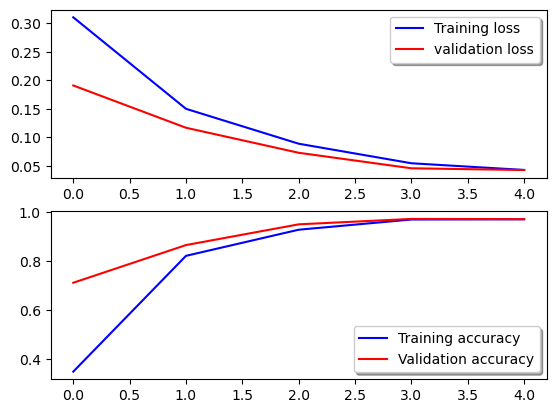

In [16]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

image_format = 'svg' # e.g .png, .svg, etc.
image_name = './results.svg'

fig.savefig(image_name, format=image_format, dpi=1200)